## 6.2 일반화최소제곱회귀

### GLS

In [1]:
# install.packages("nlme")
library(nlme)
g = gls(Employed ~ GNP + Population, correlation = corAR1(), data = longley)
summary(g)

Generalized least squares fit by REML
  Model: Employed ~ GNP + Population 
  Data: longley 
       AIC      BIC    logLik
  44.66377 47.48852 -17.33188

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.6441692 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 101.85813 14.198932  7.173647  0.0000
GNP           0.07207  0.010606  6.795485  0.0000
Population   -0.54851  0.154130 -3.558778  0.0035

 Correlation: 
           (Intr) GNP   
GNP         0.943       
Population -0.997 -0.966

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.5924564 -0.5447822 -0.1055401  0.3639202  1.3281898 

Residual standard error: 0.689207 
Degrees of freedom: 16 total; 13 residual

In [2]:
round(intervals(g)$coef, 2)
round(intervals(g)$corStruct, 2)

,lower,est.,upper
(Intercept),71.18,101.86,132.53
GNP,0.05,0.07,0.09
Population,-0.88,-0.55,-0.22


,lower,est.,upper
Phi,-0.44,0.64,0.96


### OLS

In [3]:
o = lm(Employed ~ GNP + Population, data = longley)
summary(o, cor = T)


Call:
lm(formula = Employed ~ GNP + Population, data = longley)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80899 -0.33282 -0.02329  0.25895  1.08800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 88.93880   13.78503   6.452 2.16e-05 ***
GNP          0.06317    0.01065   5.933 4.96e-05 ***
Population  -0.40974    0.15214  -2.693   0.0184 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5459 on 13 degrees of freedom
Multiple R-squared:  0.9791,	Adjusted R-squared:  0.9758 
F-statistic: 303.9 on 2 and 13 DF,  p-value: 1.221e-11

Correlation of Coefficients:
           (Intercept) GNP  
GNP         0.98            
Population -1.00       -0.99


In [4]:
round(confint(o), 2)
anova(g, o)

,2.5 %,97.5 %
(Intercept),59.16,118.72
GNP,0.04,0.09
Population,-0.74,-0.08


,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
g,"gls(model = Employed ~ GNP + Population, data = longley, correlation = corAR1())",1,5,44.66377,47.48852,-17.33188,,NA,NA
o,"lm(formula = Employed ~ GNP + Population, data = longley)",2,4,46.38923,48.64903,-19.19462,1 vs 2,3.725466,0.05358867


## 6.3 ARIMA 오차 회귀모형



### 6.3.1 자기회귀(AR) 오차를 가지는 회귀모형

### 예제 2. 경제 측도 자료

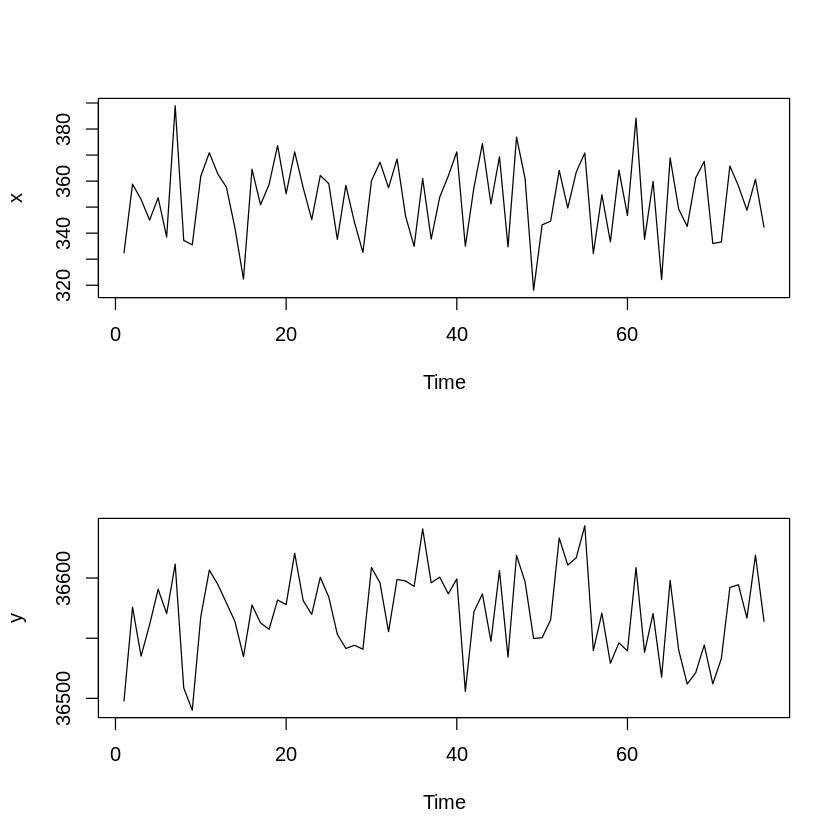

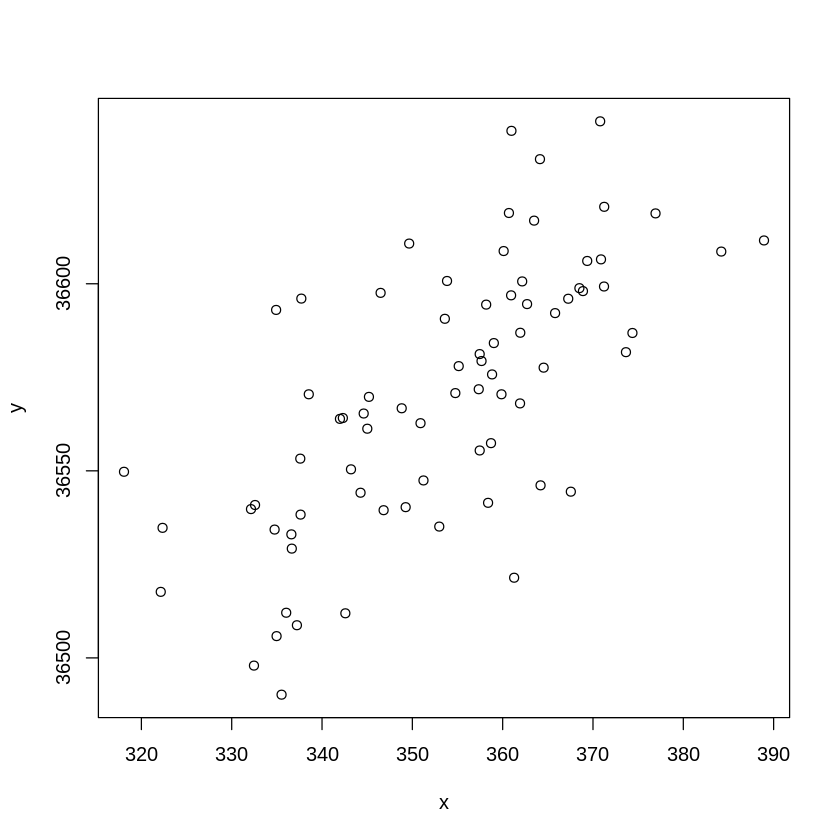

In [5]:
x = ts(scan("/content/sample_data/6_econ_x.dat"))
y = ts(scan("/content/sample_data/6_econ_y.dat"))
par(mfrow = c(2, 1))
plot.ts(x)
plot.ts(y)

par(mfrow = c(1, 1))
plot.ts(x, y, xy.lines = F, xy.labels = F)

#### 단계 1. OLS 회귀적합 : 동 시간에서 두 변수 간의 선형회귀 관계를 추정

In [6]:
reg = lm(y ~ x)
summary(reg)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.998 -16.403   2.365  12.663  57.931 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.600e+04  7.152e+01 503.377  < 2e-16 ***
x           1.610e+00  2.023e-01   7.957 1.56e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.83 on 74 degrees of freedom
Multiple R-squared:  0.4611,	Adjusted R-squared:  0.4538 
F-statistic: 63.31 on 1 and 74 DF,  p-value: 1.565e-11


+ 회귀식은 유의하나 설명력이 높지 않음

In [7]:
reg2 = lm(y ~ x + time(x))
summary(reg2)


Call:
lm(formula = y ~ x + time(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-62.230 -16.172   2.257  12.743  57.948 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.600e+04  7.233e+01 497.710  < 2e-16 ***
x           1.610e+00  2.038e-01   7.902 2.15e-11 ***
time(x)     7.767e-03  1.360e-01   0.057    0.955    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26 on 73 degrees of freedom
Multiple R-squared:  0.4611,	Adjusted R-squared:  0.4463 
F-statistic: 31.23 on 2 and 73 DF,  p-value: 1.586e-10


time(x) 변수는 유의하지 않으므로 시간에 따른 추세는 없다.

#### 단계 2. 잔차의 AR 구조 파악

ACF,0.64,0.36,0.08,-0.07,-0.12,-0.11,-0.11,-0.04,0.04,0.02,-0.05,-0.08,-0.09,-0.1,-0.03,-0.01,0.04,0.12,0.10
PACF,0.64,-0.07,-0.20,-0.02,0.00,-0.01,-0.06,0.06,0.09,-0.13,-0.12,0.05,0.02,-0.1,0.09,-0.01,0.02,0.10,-0.08


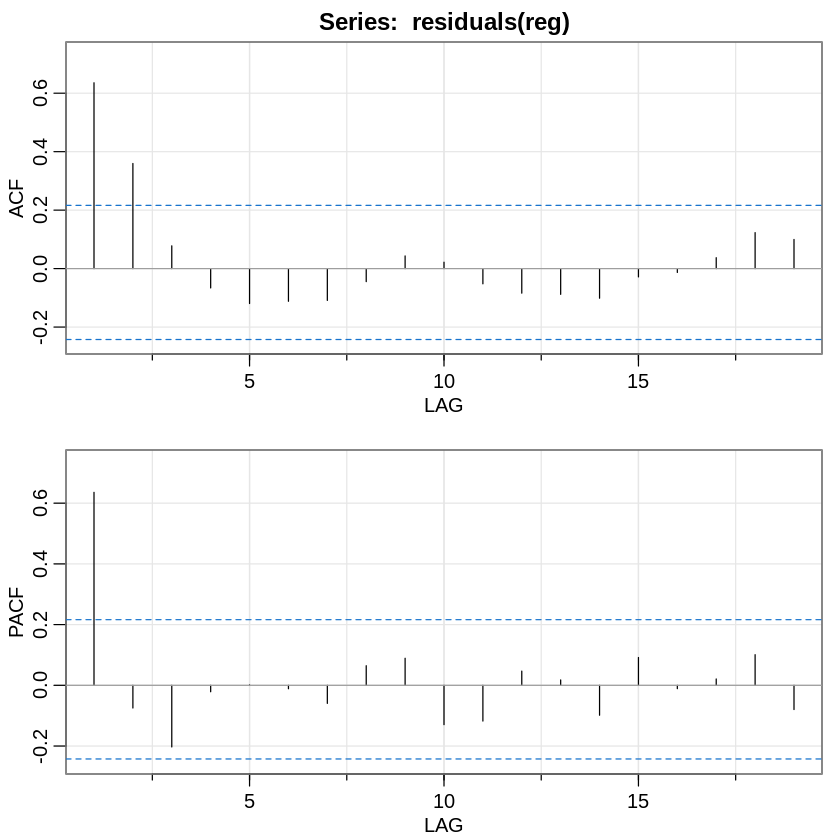

In [8]:
# install.packages("astsa")
library(astsa)
acf2(residuals(reg))

오차는 AR(1) 구조를 따름

#### 단계 3. AR 계수 추정 : 잔차를 적합하는 AR(1) 모형의 계수를 추정하고, 모형 진단 결과도 함께 제시함

initial  value 3.229004 
iter   2 value 2.958676
iter   3 value 2.958511
iter   4 value 2.958366
iter   4 value 2.958366
final  value 2.958366 
converged
initial  value 2.971232 
iter   2 value 2.971136
iter   3 value 2.971118
iter   3 value 2.971118
iter   3 value 2.971118
final  value 2.971118 
converged


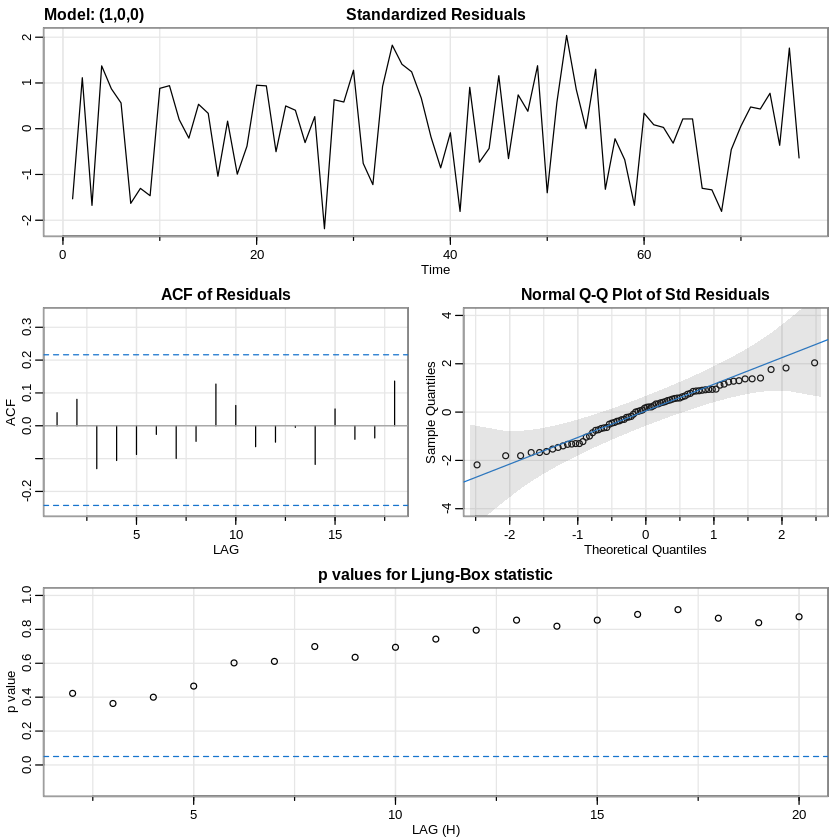

In [9]:
ar1res = sarima(residuals(reg), 1, 0, 0, no.constant = T)

In [10]:
ar1res

$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1
      0.6488
s.e.  0.0875

sigma^2 estimated as 378.1:  log likelihood = -333.64,  aic = 671.29

$degrees_of_freedom
[1] 75

$ttable
    Estimate     SE t.value p.value
ar1   0.6488 0.0875  7.4136       0

$AIC
[1] 8.832745

$AICc
[1] 8.833456

$BIC
[1] 8.89408


+ AR(1) 모형의 계수 : 0.6488

#### 단계 4. 변수 생성

In [11]:
x1 = ts.intersect(x, lag(x, -1))
y1 = ts.intersect(y, lag(y, -1))
x1
y1

,x,"lag(x, -1)"
2,358.8267,332.4641
3,352.9803,358.8267
4,345.0131,352.9803
5,353.5984,345.0131
6,338.5335,353.5984
7,388.9333,338.5335
8,337.2194,388.9333
9,335.5204,337.2194
10,361.9229,335.5204
11,370.8853,361.9229


,y,"lag(y, -1)"
2,36575.77,36497.94
3,36535.10,36575.77
4,36561.26,36535.10
5,36590.64,36561.26
6,36570.46,36590.64
7,36611.58,36570.46
8,36508.73,36611.58
9,36490.17,36508.73
10,36568.02,36490.17
11,36606.52,36568.02


In [12]:
xnew = x1[, 1] - 0.6488 * x1[, 2]
ynew = y1[, 1] - 0.6488 * y1[, 2]

#### 단계 5. 조정된 변수에 대해 OLS 회귀 적합

In [13]:
adj_reg = lm(ynew ~ xnew)
summary(adj_reg)


Call:
lm(formula = ynew ~ xnew)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.496 -12.986   2.837  15.272  38.594 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.264e+04  1.476e+01  856.50   <2e-16 ***
xnew        1.635e+00  1.174e-01   13.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.51 on 73 degrees of freedom
Multiple R-squared:  0.7266,	Adjusted R-squared:  0.7228 
F-statistic:   194 on 1 and 73 DF,  p-value: < 2.2e-16


+ 모형은 유의하고 기울기는 1.635

ACF,0.06,0.05,-0.11,-0.09,-0.08,-0.06,-0.13,-0.08,0.15,0.07,-0.05,-0.06,0.01,-0.12,0.03,-0.04,-0.06,0.13,0.13
PACF,0.06,0.04,-0.11,-0.08,-0.06,-0.06,-0.14,-0.09,0.16,0.02,-0.13,-0.07,0.04,-0.14,0.00,-0.01,-0.07,0.08,0.08


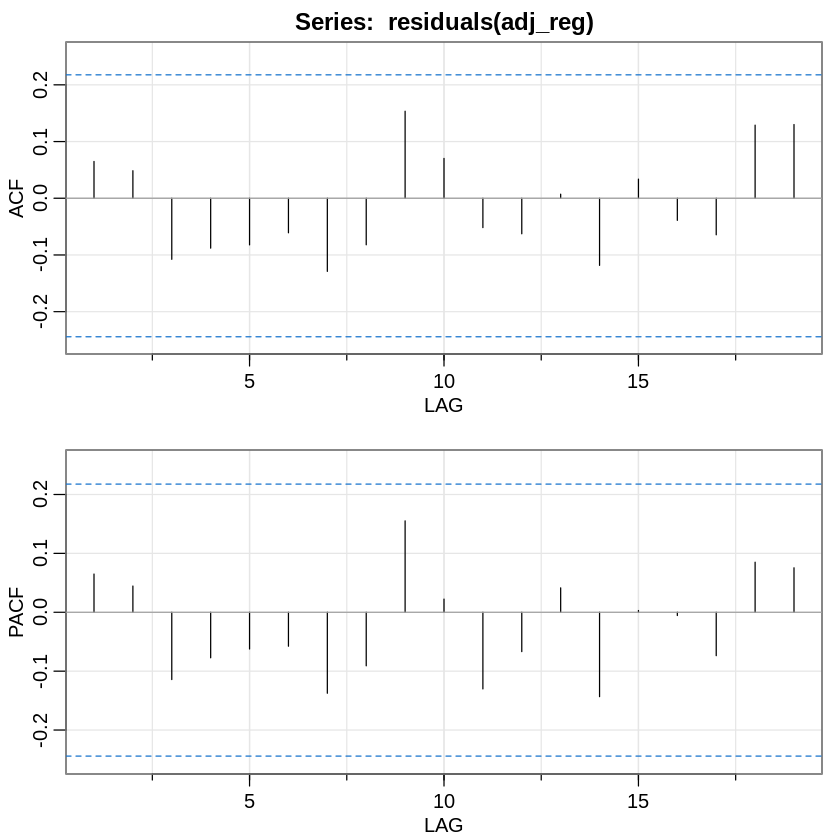

In [14]:
acf2(residuals(adj_reg))

#### cochrane.orcutt{orcutt} 함수를 이용하여 문제 풀이

In [15]:
# install.packages("orcutt")
library(orcutt)
cochrane.orcutt(reg)
summary(cochrane.orcutt(reg))

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Cochrane-orcutt estimation for first order autocorrelation 
 
Call:
lm(formula = y ~ x)

 number of interaction: 4
 rho 0.63843

Durbin-Watson statistic 
(original):    0.69523 , p-value: 4.72e-11
(transformed): 1.83115 , p-value: 2.515e-01
 
 coefficients: 
 (Intercept)            x 
35994.746022     1.634731 

Call:
lm(formula = y ~ x)

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 3.5995e+04 4.2214e+01 852.683 < 2.2e-16 ***
x           1.6347e+00 1.1804e-01  13.849 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.5127 on 73 degrees of freedom
Multiple R-squared:  0.7243 ,  Adjusted R-squared:  0.7205
F-statistic: 191.8 on 1 and 73 DF,  p-value: < 4.097e-22

Durbin-Watson statistic 
(original):    0.69523 , p-value: 4.72e-11
(transformed): 1.83115 , p-value: 2.515e-01

+ $y_t$와 $x_t$ 간의 추정된 관계식 : $y_t = 35995 + 1.635x_t$
+ 오차에 대한 추정된 관계식 : $e_t = 0.6384e_{t-1} + w_t$

## 6.3.2 ARIMA 오차를 가지는 회귀모형

### 예제 3. [예제 2]에 이어

#### (a) gls{nlme} 함수 이용 : 오차분산 $\sum$을 가지는 회귀적합

In [16]:
library(nlme)
gls = gls(y ~ x, correlation = corARMA(p = 1, q = 0), method = "ML")
summary(gls)

Generalized least squares fit by maximum likelihood
  Model: y ~ x 
  Data: NULL 
       AIC      BIC    logLik
  675.1457 684.4686 -333.5728

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.6495928 

Coefficients:
               Value Std.Error  t-value p-value
(Intercept) 35986.29  42.02166 856.3748       0
x               1.65   0.11788  14.0151       0

 Correlation: 
  (Intr)
x -0.989

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.41574990 -0.64497525  0.09649042  0.52680591  2.27864195 

Residual standard error: 25.54999 
Degrees of freedom: 76 total; 74 residual

#### (b) arima() 함수 이용

In [17]:
arima = arima(y, order = c(1, 0, 0), xreg = cbind(x))
arima
anova(gls, reg)


Call:
arima(x = y, order = c(1, 0, 0), xreg = cbind(x))

Coefficients:
         ar1   intercept  cbind(x)
      0.6496  35986.2860    1.6521
s.e.  0.0874     41.4673    0.1163

sigma^2 estimated as 377.3:  log likelihood = -333.57,  aic = 675.15

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
gls,"gls(model = y ~ x, correlation = corARMA(p = 1, q = 0), method = ""ML"")",1,4,675.1457,684.4686,-333.5728,,NA,NA
reg,lm(formula = y ~ x),2,3,713.8736,720.8658,-353.9368,1 vs 2,40.72795,1.749669e-10


+ GLS가 OLS보다 성능이 우수

In [18]:
gls.1 = update(gls, correlation = corARMA(p = 1, q = 1))
anova(gls.1, gls)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
gls.1,"gls(model = y ~ x, correlation = corARMA(p = 1, q = 1), method = ""ML"")",1,5,676.7411,688.3948,-333.3706,,NA,NA
gls,"gls(model = y ~ x, correlation = corARMA(p = 1, q = 0), method = ""ML"")",2,4,675.1457,684.4686,-333.5728,1 vs 2,0.4045304,0.5247588


+ 오차에 대해 두 모형이 유의한 차이가 없으므로 단순한 AR(1) 모형을 선택

### 예제 4

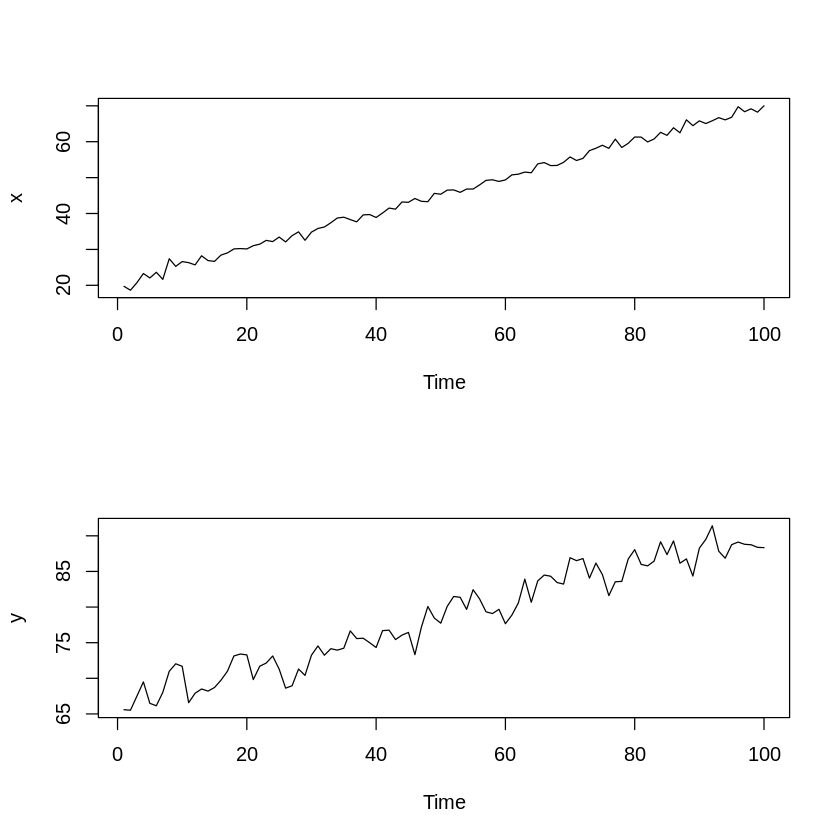

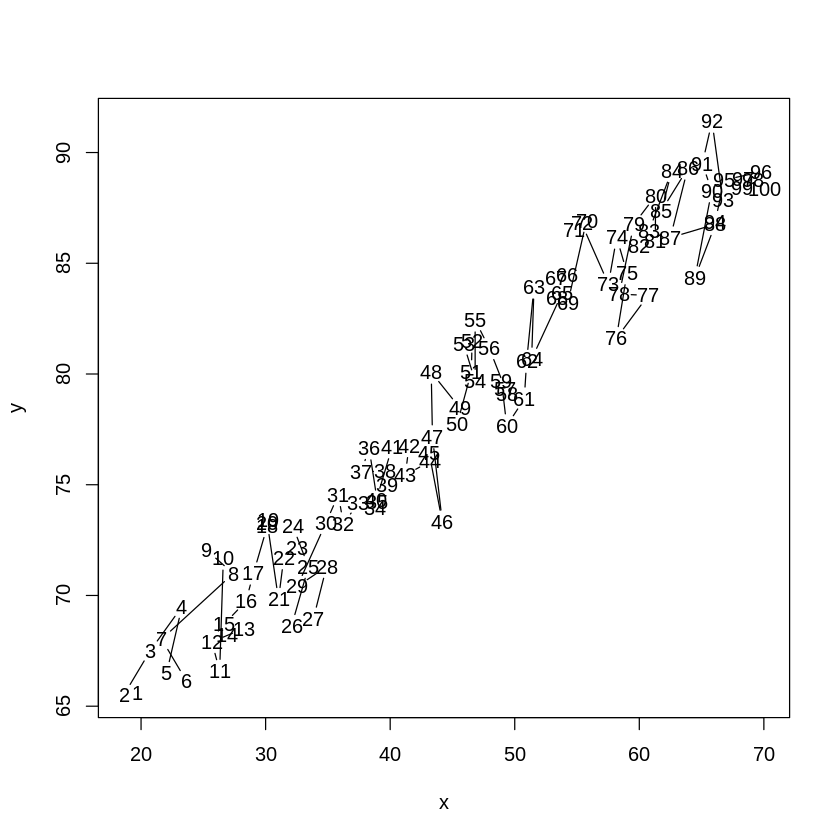

In [19]:
library(astsa)
x = ts(scan("/content/sample_data/6_sim_x.dat"))
y = ts(scan("/content/sample_data/6_sim_y.dat"))
par(mfrow = c(2, 1))
plot.ts(x)
plot.ts(y)

par(mfrow = c(1, 1))
plot.ts(x, y, pch = 20)

#### 단계 1. 통상의 회귀모형 적합

In [20]:
trend = time(y)
reg = lm(y ~ trend + x)
summary(reg)


Call:
lm(formula = y ~ trend + x)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4976 -1.1249 -0.1936  1.3783  3.4412 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 57.76368    3.84726  15.014   <2e-16 ***
trend        0.03450    0.09416   0.366    0.715    
x            0.41798    0.18859   2.216    0.029 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.774 on 97 degrees of freedom
Multiple R-squared:  0.9416,	Adjusted R-squared:  0.9404 
F-statistic: 782.1 on 2 and 97 DF,  p-value: < 2.2e-16


+ trend(추세)가 유의하지 않으나, x는 시간에 따라 증가하고 있으며 $R^2 = 0.9416$으로 시간과 강한 상관관계를 가진다.

In [21]:
dx = residuals(lm(x ~ trend))
reg = lm(y ~ trend + dx)
summary(reg)


Call:
lm(formula = y ~ trend + dx)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4976 -1.1249 -0.1936  1.3783  3.4412 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 66.253549   0.357552 185.298   <2e-16 ***
trend        0.242735   0.006147  39.489   <2e-16 ***
dx           0.417980   0.188592   2.216    0.029 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.774 on 97 degrees of freedom
Multiple R-squared:  0.9416,	Adjusted R-squared:  0.9404 
F-statistic: 782.1 on 2 and 97 DF,  p-value: < 2.2e-16


#### 단계 2. 잔차의 ARIMA 구조 파악

ACF,0.47,0.10,-0.05,-0.03,-0.07,-0.11,-0.14,-0.17,-0.24,-0.13,0.08,0.13,0.07,0.13,0.17,0.15,0.11,0.10,0.07,0.02
PACF,0.47,-0.16,-0.04,0.04,-0.10,-0.05,-0.07,-0.10,-0.17,0.06,0.12,-0.01,-0.02,0.14,0.04,0.01,0.06,0.05,0.02,0.08


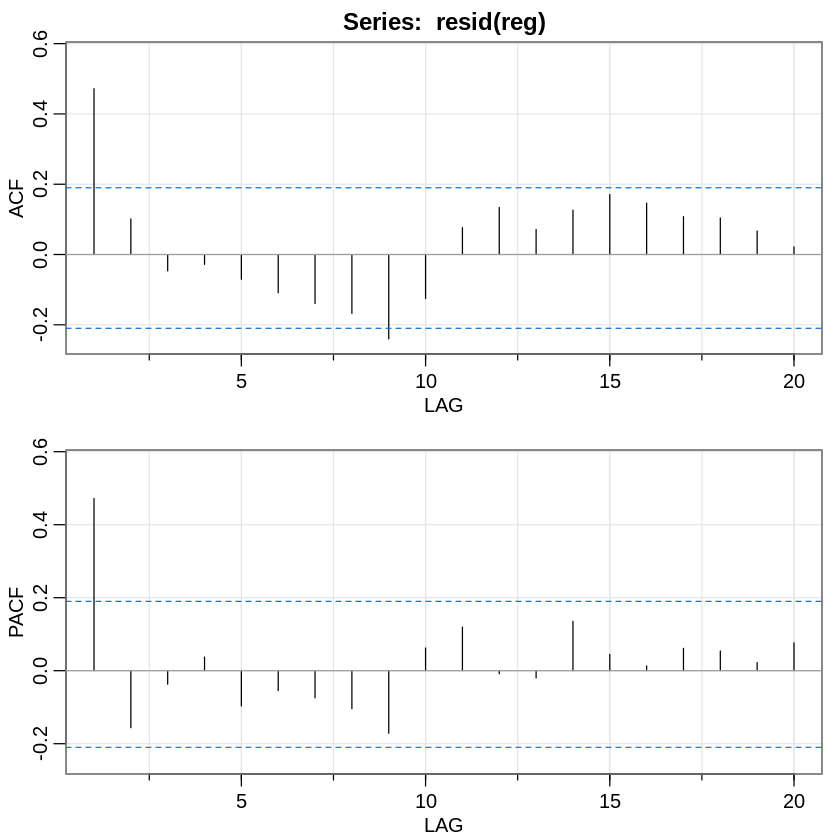

In [22]:
acf2(resid(reg))

+ 잔차에 대해 AR(1), MA(1) or ARIMA(1, 0, 1) 고려 가능 > MA(1)만 적합

#### 단계 3. MA(1) 잔차를 가지는 조정 회귀 적합과 모형 진단

initial  value 0.558215 
iter   2 value 0.434071
iter   3 value 0.433960
iter   4 value 0.433771
iter   5 value 0.433770
iter   6 value 0.433770
iter   7 value 0.433770
iter   7 value 0.433770
iter   7 value 0.433770
final  value 0.433770 
converged
initial  value 0.434874 
iter   2 value 0.434870
iter   3 value 0.434865
iter   4 value 0.434865
iter   5 value 0.434865
iter   5 value 0.434865
iter   5 value 0.434865
final  value 0.434865 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = xreg, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
         ma1  intercept   trend      dx
      0.4551    66.2633  0.2423  0.4364
s.e.  0.0753     0.4489  0.0077  0.1421

sigma^2 estimated as 2.381:  log likelihood = -185.38,  aic = 380.76

$degrees_of_freedom
[1] 96

$ttable
          Estimate     SE  t.value p.value
ma1         0.4551 0.0753   6.0475  0.0000
intercept  66.2633 0.4489 147.6059  0.0000
trend       0.2423 0.0077  31.4466  0.0000
dx          0.4364 0.1421   3.0711  0.0028

$AIC
[1] 3.807608

$AICc
[1] 3.811818

$BIC
[1] 3.937866


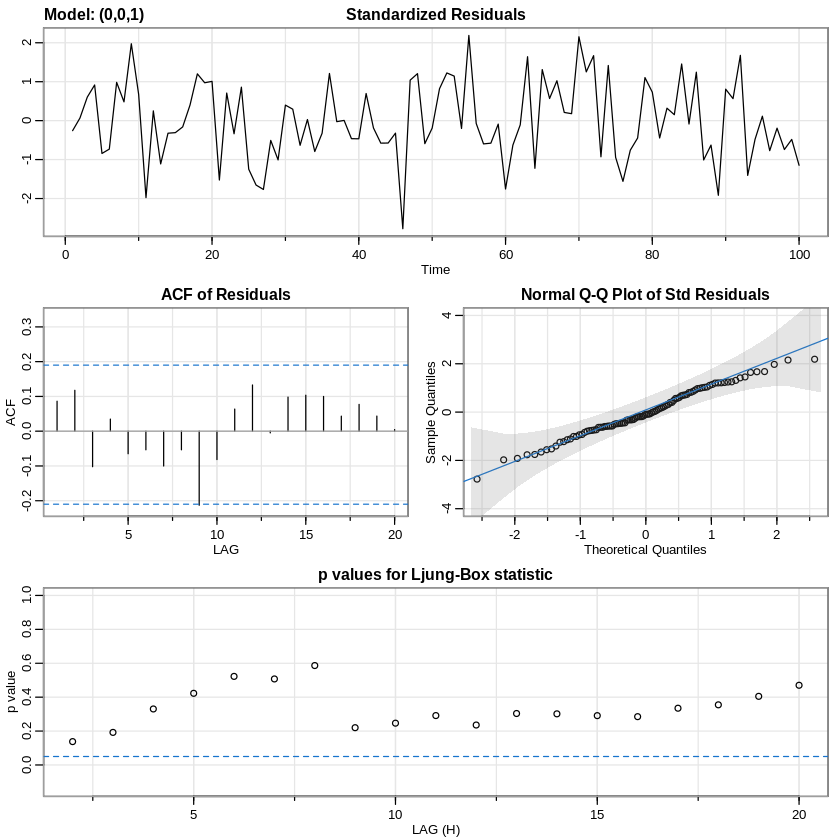

In [23]:
adj.reg = sarima(y, 0, 0, 1, xreg = cbind(trend, dx))
adj.reg

+ 적합 모형 : $y_t = 66.2633 + 0.2423t + 0.4364dx_t + e_t$

ACF,0.09,0.12,-0.10,0.03,-0.06,-0.05,-0.10,-0.05,-0.21,-0.08,0.06,0.13,0.00,0.10,0.10,0.10,0.04,0.08,0.04,0.00
PACF,0.09,0.11,-0.12,0.04,-0.05,-0.07,-0.07,-0.04,-0.20,-0.06,0.12,0.09,-0.06,0.08,0.09,0.02,0.03,0.06,0.03,0.04


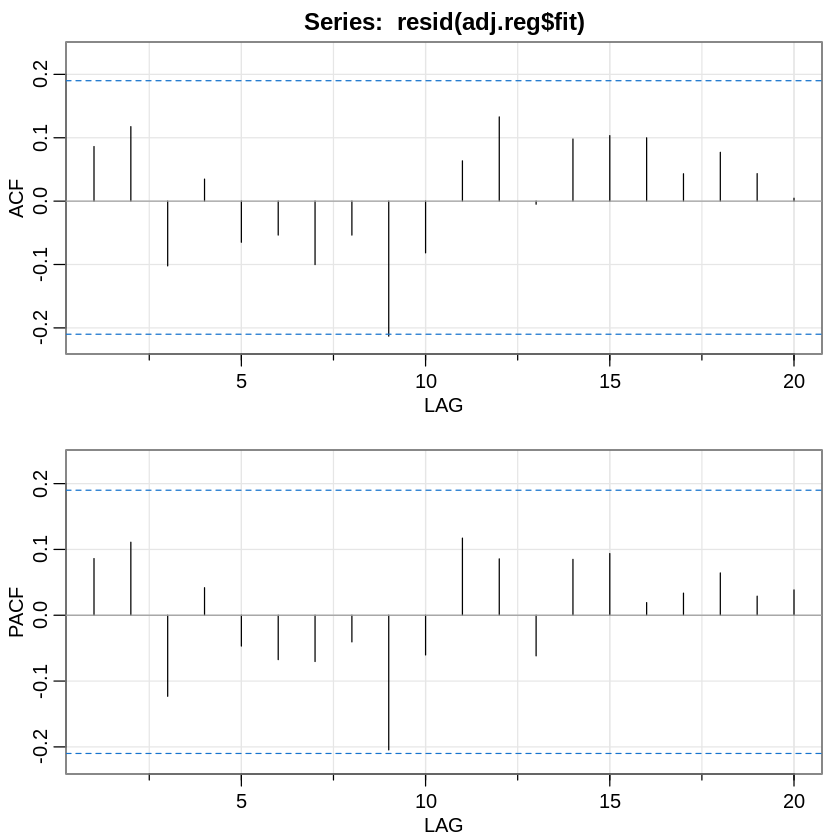

In [24]:
acf2(resid(adj.reg$fit))

#### gls{nlme} 함수를 이용하여 문제 풀이

In [25]:
library(nlme)
summary(gls(y ~ trend + dx), correlation = corARMA(form = ~ 1, p = 0, q = 1))

Generalized least squares fit by REML
  Model: y ~ trend + dx 
  Data: NULL 
       AIC    BIC    logLik
  414.9412 425.24 -203.4706

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 66.25355 0.3575520 185.29767   0.000
trend        0.24273 0.0061469  39.48896   0.000
dx           0.41798 0.1885916   2.21633   0.029

 Correlation: 
      (Intr) trend 
trend -0.868       
dx     0.000  0.000

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.5347374 -0.6339517 -0.1091160  0.7768066  1.9393802 

Residual standard error: 1.774368 
Degrees of freedom: 100 total; 97 residual

### 예제 5. 빙하 퇴적층 자료

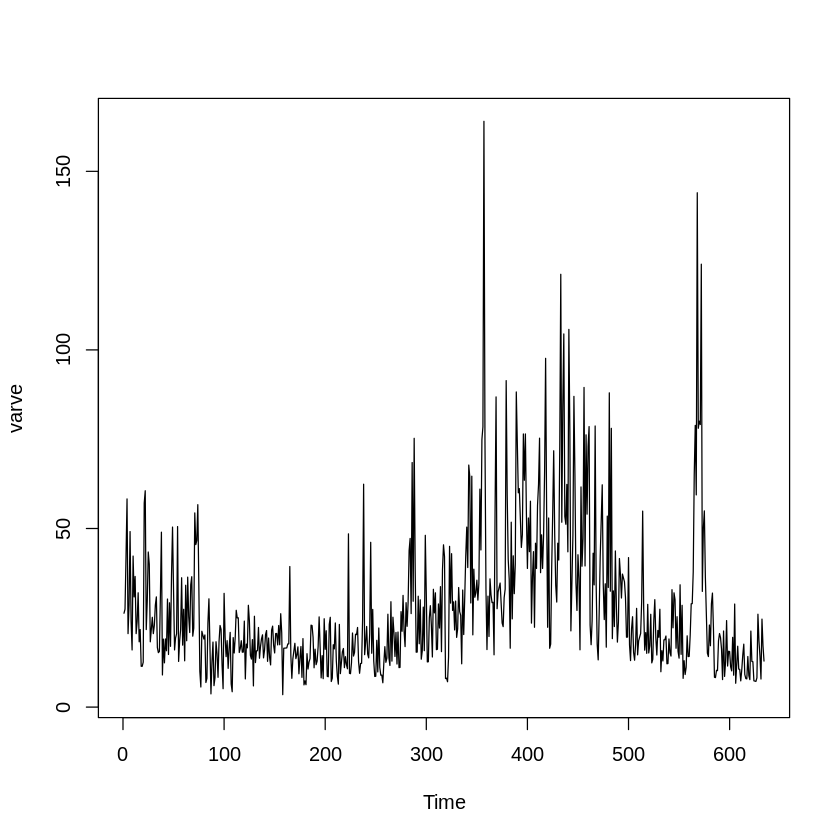

In [26]:
library(astsa)
data(varve)
plot.ts(varve)

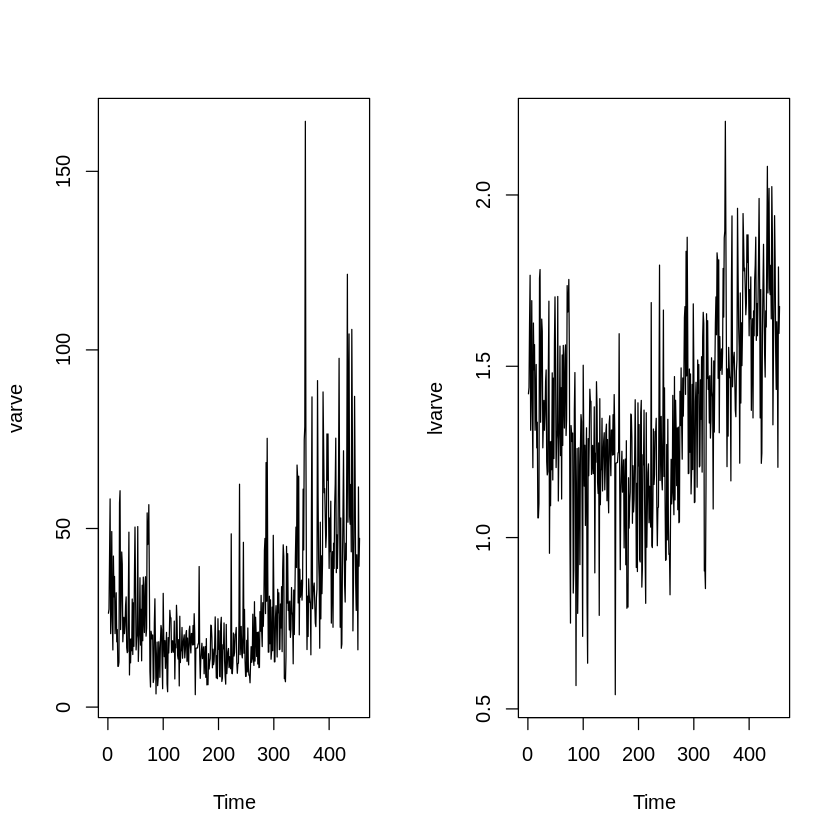

In [27]:
varve = ts(varve[1:455])
lvarve = log(varve, 10)
par(mfrow = c(1, 2))
plot.ts(varve)
plot.ts(lvarve)

+ 분산 안정화와 이상치 효과의 완화를 위해 로그 변환

In [28]:
trend = time(lvarve) - mean(time(lvarve))
trend2 = trend^2
reg = lm(lvarve ~ trend + trend2)
summary(reg)


Call:
lm(formula = lvarve ~ trend + trend2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68884 -0.12418  0.01212  0.13195  0.74037 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.220e+00  1.502e-02   81.19   <2e-16 ***
trend       9.047e-04  7.626e-05   11.86   <2e-16 ***
trend2      8.283e-06  6.491e-07   12.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2137 on 452 degrees of freedom
Multiple R-squared:  0.4018,	Adjusted R-squared:  0.3991 
F-statistic: 151.8 on 2 and 452 DF,  p-value: < 2.2e-16


ACF,0.28,0.11,0.07,0.08,0.08,0.08,0.02,0.07,0.07,0.02,⋯,-0.01,0.05,-0.03,-0.07,-0.01,-0.03,-0.02,-0.01,-0.05,-0.03
PACF,0.28,0.03,0.03,0.06,0.04,0.05,-0.02,0.06,0.03,-0.02,⋯,-0.04,0.07,-0.07,-0.06,0.03,-0.02,0.00,0.00,-0.04,-0.03


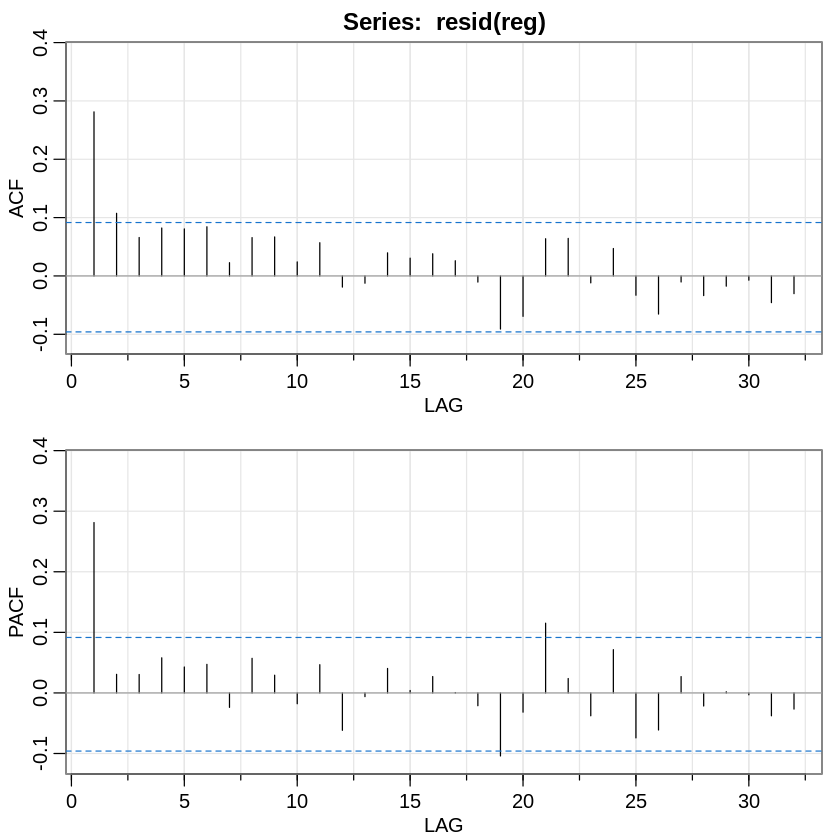

In [29]:
acf2(resid(reg))

 + 잔차에 대해 AR(1), MA(1) or ARIMA(1, 0, 1) 고려 가능 > AR(1)만 적합

initial  value -1.545602 
iter   2 value -1.586859
iter   3 value -1.586860
iter   4 value -1.586860
iter   5 value -1.586861
iter   6 value -1.586861
iter   6 value -1.586861
iter   6 value -1.586861
final  value -1.586861 
converged
initial  value -1.587858 
iter   2 value -1.587859
iter   3 value -1.587859
iter   4 value -1.587859
iter   5 value -1.587859
iter   5 value -1.587859
iter   5 value -1.587859
final  value -1.587859 
converged


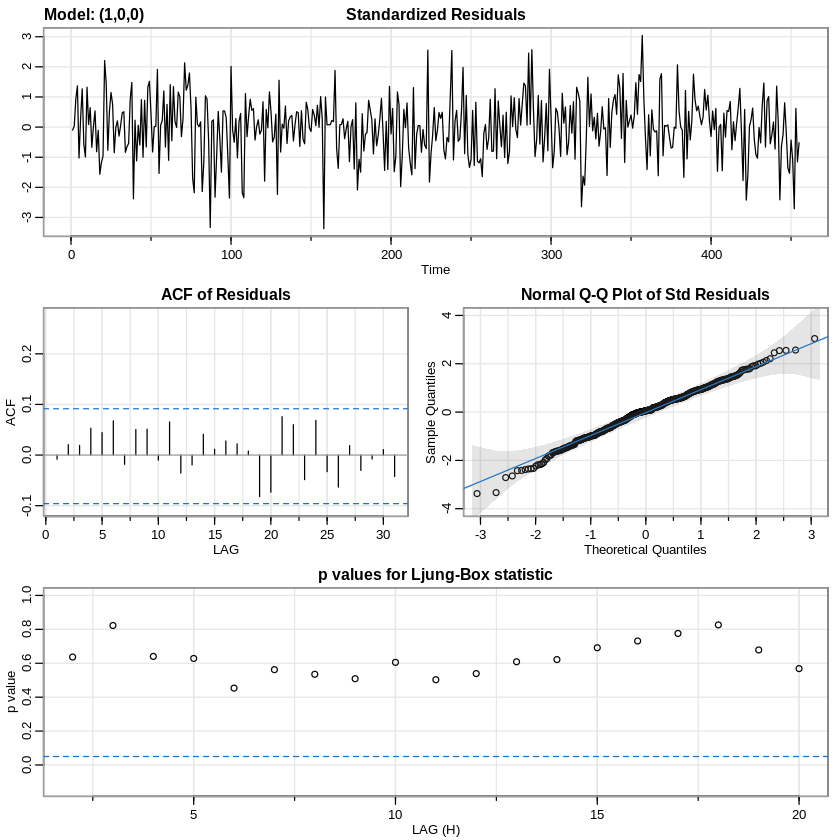

In [30]:
adj.reg = sarima(lvarve, 1, 0, 0, xreg = cbind(trend, trend2))

In [31]:
adj.reg 

$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = xreg, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
         ar1  intercept  trend  trend2
      0.2810     1.2202  9e-04       0
s.e.  0.0466     0.0202  1e-04       0

sigma^2 estimated as 0.04176:  log likelihood = 76.86,  aic = -143.72

$degrees_of_freedom
[1] 451

$ttable
          Estimate     SE t.value p.value
ar1         0.2810 0.0466  6.0290  0.0000
intercept   1.2202 0.0202 60.2954  0.0000
trend       0.0009 0.0001  8.0967  0.0000
trend2      0.0000 0.0000  0.1681  0.8666

$AIC
[1] -0.315863

$AICc
[1] -0.3156676

$BIC
[1] -0.270585


In [32]:
adj.reg$fit$coef

ar1    intercept        trend       trend2 
2.810406e-01 1.220182e+00 9.029253e-04 8.258442e-06

+ 추정된 모형 : $log_{10}{y} = 1.220182 + 0.0009029253(t-\bar{t}) + 0.000008258442(t-\bar{t})^2$